In [18]:
import Spin_model
import matplotlib.pyplot as plt
import numpy as np

class calculator():
    def __init__(self, samples):
        self.samples = samples
        self.N = samples.shape[0]
        self.M = samples.shape[1]
        self.len_T = samples.shape[2]
        
        
    def magnetization(self):
        ## sample shape : N X M X len_T
        ## M ~ <S>
        
        M_array = np.zeros(self.len_T)
        
        for temp_idx in range(self.len_T):
            M = abs(np.average(self.samples[:,:,temp_idx], axis = 0))
            ave_M = np.average(M)
            M_array[temp_idx] = ave_M
        
        return M_array
    
    
    def susceptibility(self,Temperature_array):
        ## sample shape : N X M X len_T
        ## X ~ <M^2> - <M>^2
        
        sucep_array = np.zeros(self.len_T)
        
        for temp_idx,Temperature in enumerate(Temperature_array):
            M = abs(np.average(self.samples[:,:,temp_idx], axis = 0))
            ave_M = np.average(M)

            M2 = M**2
            ave_M2 = np.average(M2)

            suscep = np.sqrt(self.N) * (ave_M2 - ave_M**2) / Temperature
            sucep_array[temp_idx] = suscep
            
        return sucep_array
    
    
    def energy(self,J):
        ## sample shape : N X M X len_T
        ## E ~ -Sum Jij * Si * Sj
        
        E_array = np.zeros(self.len_T)
        
        for temp_idx in range(self.len_T):
            E = np.diag((-self.samples[:,:,temp_idx].T@J@self.samples[:,:,temp_idx])/(2*np.sqrt(self.N)))
            ave_E = np.average(E)
            E_array[temp_idx] = ave_E
            
        return E_array
    
    
    def Specific_heat(self,Temperature_array,J):
        ## sample shape : N X M X len_T
        ## X ~ <E^2> - <E>^2
        
        C_array = np.zeros(self.len_T)
        
        for temp_idx,Temperature in enumerate(Temperature_array):
            E = np.diag((-self.samples[:,:,temp_idx].T@J@self.samples[:,:,temp_idx])
                        /(2*np.sqrt(self.N)))
            ave_E = np.average(E)
            
            E2 = E**2
            ave_E2 = np.average(E2)
            
            C = self.N * (ave_E2 - ave_E**2) / (Temperature**2)
            C_array[temp_idx] = C
            
        return C_array
    
        
    
    def Edward_Anderson(self):
        ## sample shape : N X M X len_T
        ## q_EA ~ <Si * Sj> -- i,j 는 다른 샘플
    
        q_array = np.zeros(self.len_T)
        
        for temp_idx in range(self.len_T):
            
            overlap = self.samples[:,:,temp_idx].T@self.samples[:,:,temp_idx] / self.N - np.eye(self.M)
            q = abs(np.average(overlap))
            q_array[temp_idx] = q
    
        return q_array


    def SG_susceptibility(self):
        ## sample shape : N X M X len_T
        ## X_SG ~ 
    
        X_array = np.zeros(self.len_T)
        
        for temp_idx in range(self.len_T):
            m_i = np.average(self.samples[:,:,temp_idx] ,axis = 1)
            chi = 0.

            for i in range(self.N):
                for j in range(self.N):
                    SiSj = self.samples[i,:,temp_idx]@self.samples[j,:,temp_idx]/self.M
                    MiMj = m_i[i]*m_i[j]
                    chi += ((SiSj-MiMj)**2)/self.N

            X_array[temp_idx] = chi
            
        return X_array

In [19]:
T = np.arange(1.5,0.1,-0.1)
eq_T = 1000
K = 5
M = 2000
N = 100

model = Spin_model.Spin_simulation(N,M,T,eq_T,K)
model.adjacency_matrix('SK-model')

In [15]:
samples = model.MC_Sampling()

In [21]:
calculator_ = calculator(samples)

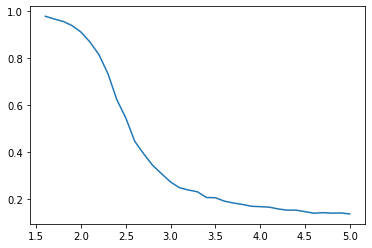

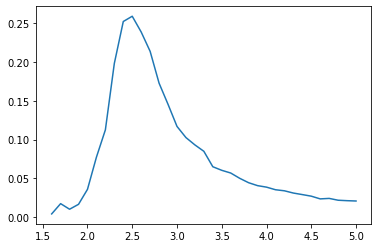

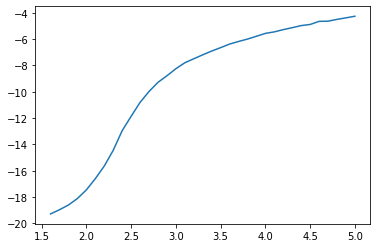

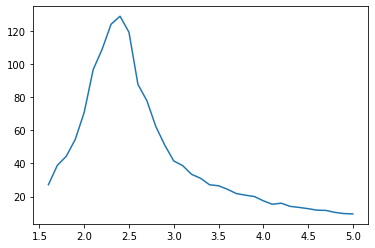

In [10]:
M = calculator_.magnetization()
plt.plot(T,M)
plt.show()

X = calculator_.susceptibility(T)
plt.plot(T,X)
plt.show()

E = calculator_.energy(model.J)
plt.plot(T,E)
plt.show()

C = calculator_.Specific_heat(T, model.J)
plt.plot(T,C)
plt.show()

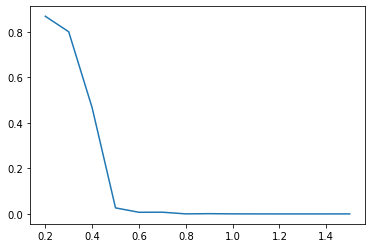

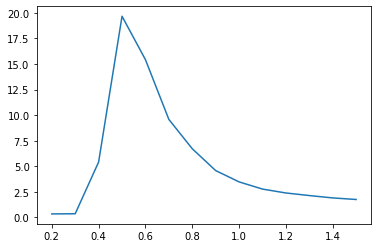

In [22]:
Q = calculator_.Edward_Anderson()
plt.plot(T,Q)
plt.show()

X = calculator_.SG_susceptibility()
plt.plot(T,X)
plt.show()

In [ ]:
samples.shape

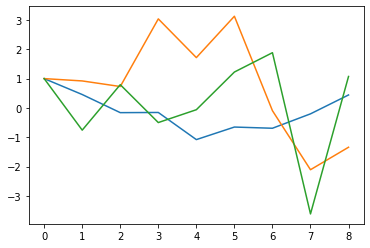

In [5]:
import torch
A = torch.zeros(M-1,10)
for en in range(10):
    A[:,en] = model.mag_autocorrelation(3)
A = torch.mean(A,1)
plt.plot(range(M-1), A)

A = torch.zeros(M-1,10)
for en in range(10):
    A[:,en] = model.mag_autocorrelation(2.5)
A = torch.mean(A,1)
plt.plot(range(M-1), A)

A = torch.zeros(M-1,10)
for en in range(10):
    A[:,en] = model.mag_autocorrelation(2)
A = torch.mean(A,1)
plt.plot(range(M-1), A)